Question - Developing an edge detector 
For this I have used the openCV library functions.

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

Edge Detection - A method to perform edge detection on image can be performed locating pixel locations which have higher gradient compared to its neighbours. Or say higher than a threshold.

<b>Sobel Edge Detection</b> - Let's say the image on which the operation needs to happen be I.

<br>1) We calculate two derivatives :
    <br>a. Horizontal Changes - This is computed by convolving I with kernel $G_{x}$ with odd size. For example a kernel of size 3 would be - <br>
    $G_{x}$ = [[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]] \* I
    <br>b. Vertical Changes - This is computed by convolving I with kernel $G_{y}$ with odd size. For example a kernel of size 3 would be - <br>
    $G_{y}$ = [[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]] \* I
               
<br>2) At each point of the image we calculate an approximation of the gradient in that point by combining both results above. $G$ = $\sqrt{G_{x}^2 + G_{y}^2}$ or you can use the simpler form $G$ = |$G_{x}$| + |$G_{y}$|.


<b> Canny Edge Detection </b> - Canny algorithm aims to satisfy 3 main criteria.
<br> 1) Low error rate - Meaning a good detection of only existent edges.
<br> 2) Good Localization - The distance between edge pixels detected and real edge pixels have to be minimized.
<br> 3) Minimal response - Only one detector response per edge.

Steps - 
<br> 1) Filter any Noise using a gaussian filter like - $K$ = 1/159 \* [[2, 4, 5, 4, 2], [4, 9, 12, 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]]
<br> 2) Find the intensity gradient of the image. The procedure is analogus to Sobel.
    <br> a) Apply a pair of convolution masks is x and y direction.
        <br> $G_{x}$ = [[1, 0, -1], [-2, 0, 2], [-1, 0, 1]]
        <br> $G_{y}$ = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
    <br> b) Find the gradient strength and direction with:
        <br> $G$ = $\sqrt{G_{x}^2 + G_{y}^2}$
        <br> $\theta$ = arctan($G_{x}$/$G_{y}$)
<br> 3) Apply non max suppression - This removes the lines that are considered not part of the edge. Only thin lines will remain.
<br> 4) Hystersis - Canny uses two thresholds - 
        a) If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge.
        b) If a pixel value is below the lower threshold, then it is rejected.
        c) If the pixel gradient is between the two threshold, then it will be accpeted only if it is considered to a pixel that is above the upper threshold.


               

In [32]:
def sobelEdgeDetector(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return sobelx, sobely

Horizontal Edges


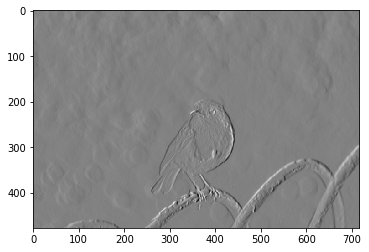

Vertical Edges


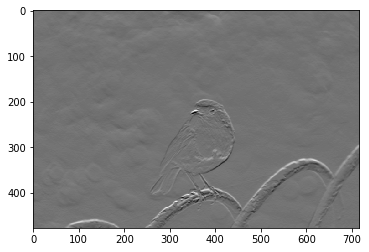

In [33]:
image = cv2.imread('../sample.jpg')
sobelx, sobely = sobelEdgeDetector(image[:,:,0])
print('Horizontal Edges')
plt.imshow(sobelx, cmap='gray')
plt.show()
print('Vertical Edges')
plt.imshow(sobely, cmap='gray')
plt.show()

In [34]:
def cannyEdgeDetector(image):
    canny = cv2.Canny(image, 20, 170)
    return canny

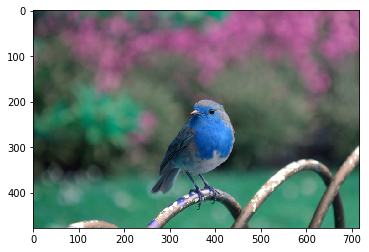

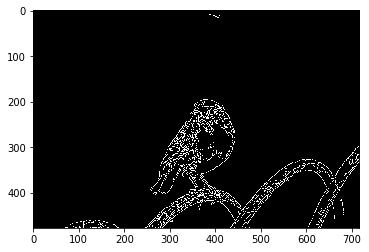

In [44]:
image = cv2.imread('../sample.jpg')
plt.imshow(image)
plt.show()
canny = cannyEdgeDetector(image)
plt.imshow(canny, cmap='gray')
plt.show()

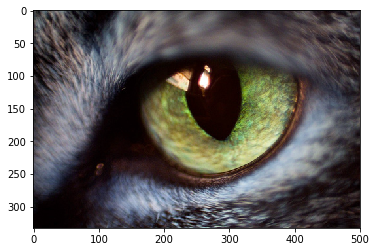

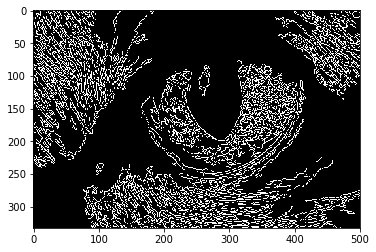

In [45]:
image = cv2.imread('../pic.jpg')
plt.imshow(image)
plt.show()
canny = cannyEdgeDetector(image)
plt.imshow(canny, cmap='gray')
plt.show()

Horizontal Edges


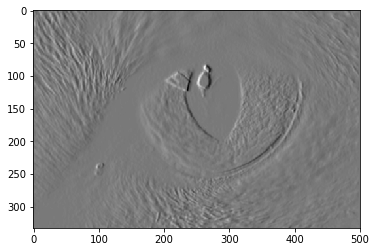

Vertical Edges


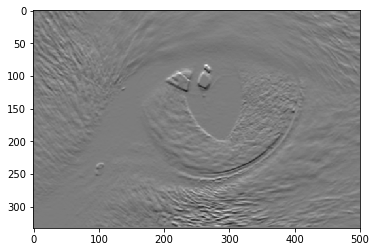

In [41]:
image = cv2.imread('../pic.jpg')
sobelx, sobely = sobelEdgeDetector(image[:,:,0])
print('Horizontal Edges')
plt.imshow(sobelx, cmap='gray')
plt.show()
print('Vertical Edges')
plt.imshow(sobely, cmap='gray')
plt.show()

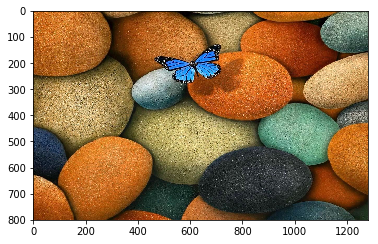

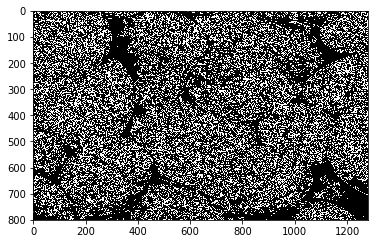

In [47]:
image = cv2.imread('../pic2.jpg')
plt.imshow(image)
plt.show()
canny = cannyEdgeDetector(image)
plt.imshow(canny, cmap='gray')
plt.show()

Horizontal Edges


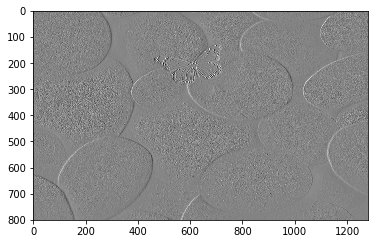

Vertical Edges


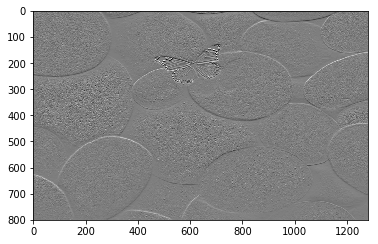

In [43]:
image = cv2.imread('../pic2.jpg')
sobelx, sobely = sobelEdgeDetector(image[:,:,0])
print('Horizontal Edges')
plt.imshow(sobelx, cmap='gray')
plt.show()
print('Vertical Edges')
plt.imshow(sobely, cmap='gray')
plt.show()